In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model as lm

In [2]:
buildings = pd.read_csv('Houses_Sold.csv')
buildings.dropna(axis=0, inplace=True)

In [3]:
bb_freq = buildings.loc[(buildings['house_size'] <= 5000),].groupby(['bed','bath']).size().reset_index(name='count')
bb_freq = bb_freq.loc[(bb_freq['bed']) > (bb_freq['bath'])]
max_beds = np.min(bb_freq.loc[(bb_freq['count'] == 1),]['bed'])-1
print(f'maximum bedrooms are {max_beds}')
# max_baths = np.max(bb_freq['bath'])
# print(f'maximum bathrooms are {max_baths}')

maximum bedrooms are 12.0


In [4]:
houses = buildings.loc[ (buildings['bed'] <= max_beds) & (buildings['bed'] > buildings['bath']) & (buildings['house_size'] <= 5000) & (buildings['price'] > 1000), ]
# houses = buildings.loc[(buildings['bed'] < 7) & (buildings['bath'] < buildings['bed']),]
houses_ar = np.array(houses.select_dtypes(include=np.number).iloc[:,1:])

PCA to reduce dimensions of housing dataframe

In [5]:
h_scaled = StandardScaler().fit_transform(houses_ar)
pca = PCA(n_components=2)
pca.fit(h_scaled)
h_PCs = pca.fit_transform(h_scaled)

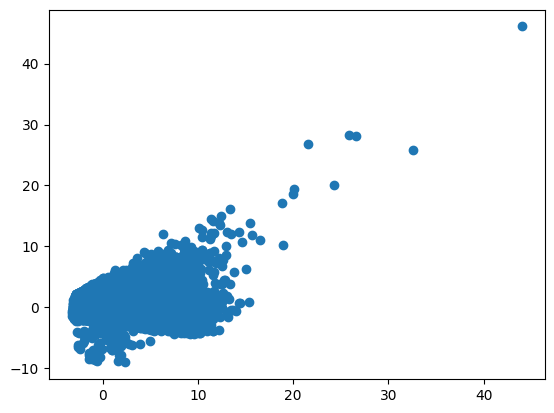

In [6]:
mask = h_PCs[:,0] < 10
plot_ar = h_PCs[mask]

fig, ax = plt.subplots()
ax.scatter(h_PCs[:,0], h_PCs[:,1])

Text(0.5, 0, 'House Square Footage')

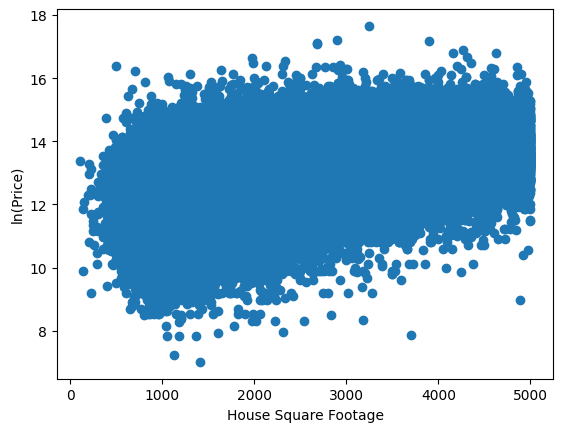

In [7]:
fig, ax = plt.subplots()
ax.scatter(houses['house_size'], np.log(houses['price']))
ax.set_ylabel('ln(Price)')
ax.set_xlabel('House Square Footage')

In [11]:
onehot_state = pd.get_dummies(houses['state'])
scale = StandardScaler()
scale.fit(np.array(houses[['house_size', 'acre_lot']]))
X = np.array(houses[['house_size', 'acre_lot']])
X = np.column_stack((X, onehot_state))
scale.fit(np.array(houses['price']).reshape(-1,1))
y = np.array(houses['price']).reshape(-1,1)

gamma = lm.GammaRegressor()
gamma.fit(X,y)
# gamma.score(X,y)

C:\Users\ej_la\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ej_la\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_glm\glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


GammaRegressor()

In [12]:
gamma.coef_

array([ 4.43672419e-04,  1.67962193e-06, -4.26011709e-03, -1.25026716e-05,
        3.50977515e-03, -3.21262677e-03,  1.19628141e-01,  1.76221098e-03,
       -1.00683231e-04, -9.86882342e-04,  1.38981595e-03,  5.97628352e-03,
       -1.07064104e-02,  2.74097988e-03,  1.44455025e-03, -1.23243309e-02,
       -2.61370351e-03, -5.02888881e-03, -3.64968083e-03, -4.73871577e-03,
       -3.59886531e-03, -4.02763909e-05, -2.08798271e-03,  6.85664223e-03,
       -6.94552082e-03, -7.82112255e-03, -1.26017083e-03, -8.27938509e-03,
        2.72109428e-04, -1.07298344e-03,  1.50550083e-03, -5.26904329e-08,
       -3.21171123e-04, -2.24011592e-03, -3.08022971e-03, -4.73643207e-03,
       -5.45945710e-04, -2.01571255e-02, -1.13161893e-02,  5.64210663e-03,
       -1.44876760e-02, -6.01986713e-05,  5.22968459e-05, -2.29969744e-03,
       -2.08688658e-04, -2.47871056e-03, -2.12668782e-02,  4.61451666e-04,
       -1.31107537e-04,  3.86885853e-07, -2.83821207e-03,  1.70151143e-02,
       -2.08244953e-03, -

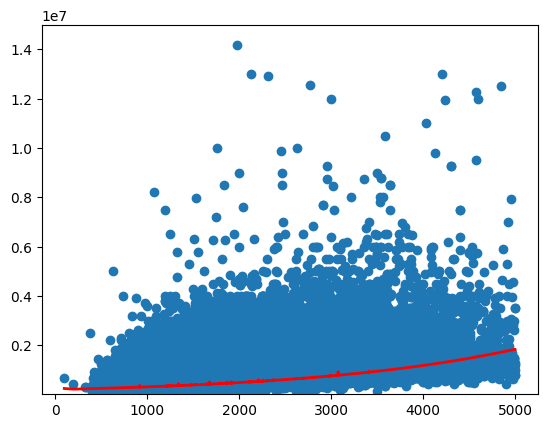

In [13]:
y_hat = gamma.predict(X)
mask = houses['state']=='California'
fig, ax = plt.subplots()
ax.scatter(houses.loc[mask,'house_size'], houses.loc[mask,'price'])
order = np.argsort(houses.loc[mask, 'house_size'])
ax.plot(houses.loc[mask,'house_size'].iloc[order], y_hat[mask][order], color='red', linewidth=2)
ax.set_ylim(0.001e7, 1.5e7)
plt.show()